In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [25]:
data = pd.read_csv('soyabean_data.csv')

In [26]:
data.head()

Year  Loc_Id  Yield       W11       W12       W13       W14       W15  \
0  2018    1114   62.6  0.011905  1.059524  0.821429  3.369048  0.214286   
1  2017    1114   53.6  0.035714  1.297619  6.559524  0.619048  0.035714   
2  2016    1114   67.5  0.000000  2.214286  0.142857  0.333333  2.083333   
3  2015    1114   61.2  3.071429  0.678571  0.119048  0.416667  4.238095   
4  2014    1114   60.0  2.250000  2.821429  0.880952  0.797619  1.297619   

        W16       W17  ...  P9  P10  P11  P12  P13  P14  S_surface1  \
0  3.797619  0.476190  ...   4    0    0    0    0    0    1.816667   
1  1.964286  0.000000  ...   4    0    0    0    0    0    1.816667   
2  0.119048  0.547619  ...   6    0    0    0    0    0    1.816667   
3  0.023810  0.000000  ...   2    1    2    1    2    2    1.816667   
4  1.095238  1.476190  ...   2    2    0    0    0    0    1.816667   

   S_surface2  S_surface3  S_surface4  
0    0.818167     0.82475      135.25  
1    0.818167     0.82475      135.25  
2    0.818167     0.82475      135.25  
3    0.818167     0.82475      135.25  
4    0.818167     0.82475      135.25  

[5 rows x 433 columns]

In [27]:
data

Year  Loc_Id  Yield        W11        W12       W13       W14       W15  \
0     2018    1114   62.6   0.011905   1.059524  0.821429  3.369048  0.214286   
1     2017    1114   53.6   0.035714   1.297619  6.559524  0.619048  0.035714   
2     2016    1114   67.5   0.000000   2.214286  0.142857  0.333333  2.083333   
3     2015    1114   61.2   3.071429   0.678571  0.119048  0.416667  4.238095   
4     2014    1114   60.0   2.250000   2.821429  0.880952  0.797619  1.297619   
...    ...     ...    ...        ...        ...       ...       ...       ...   
3995  2008     104   53.5   2.089286  11.500000  0.000000  0.142857  5.196429   
3996  2007     104   54.0   2.750000   5.696429  4.303571  0.053571  0.035714   
3997  2006     104   54.7   0.607143   1.785714  2.696429  0.000000  2.785714   
3998  2005     104   52.6  10.303571  10.892857  0.250000  0.660714  1.303571   
3999  2004     104   52.5   4.392857   0.000000  0.750000  0.857143  0.410714   

           W16       W17  ...  P9  P10  P11  P12  P13  P14  S_surface1  \
0     3.797619  0.476190  ...   4    0    0    0    0    0    1.816667   
1     1.964286  0.000000  ...   4    0    0    0    0    0    1.816667   
2     0.119048  0.547619  ...   6    0    0    0    0    0    1.816667   
3     0.023810  0.000000  ...   2    1    2    1    2    2    1.816667   
4     1.095238  1.476190  ...   2    2    0    0    0    0    1.816667   
...        ...       ...  ...  ..  ...  ...  ...  ...  ...         ...   
3995  9.910714  2.517857  ...   7   10    6    0    0    0    1.750000   
3996  0.803571  2.928571  ...   0    0    0    0    0    0    1.750000   
3997  0.035714  3.464286  ...   8    0    0    0    0    0    1.750000   
3998  1.767857  4.535714  ...   0    0    0    0    0    0    1.750000   
3999  0.660714  0.000000  ...   6    1    0    0    0    0    1.750000   

      S_surface2  S_surface3  S_surface4  
0       0.818167    0.824750      135.25  
1       0.818167    0.824750      135.25  
2       0.818167    0.824750      135.25  
3       0.818167    0.824750      135.25  
4       0.818167    0.824750      135.25  
...          ...         ...         ...  
3995    0.745000    0.745125      134.75  
3996    0.745000    0.745125      134.75  
3997    0.745000    0.745125      134.75  
3998    0.745000    0.745125      134.75  
3999    0.745000    0.745125      134.75  

[4000 rows x 433 columns]

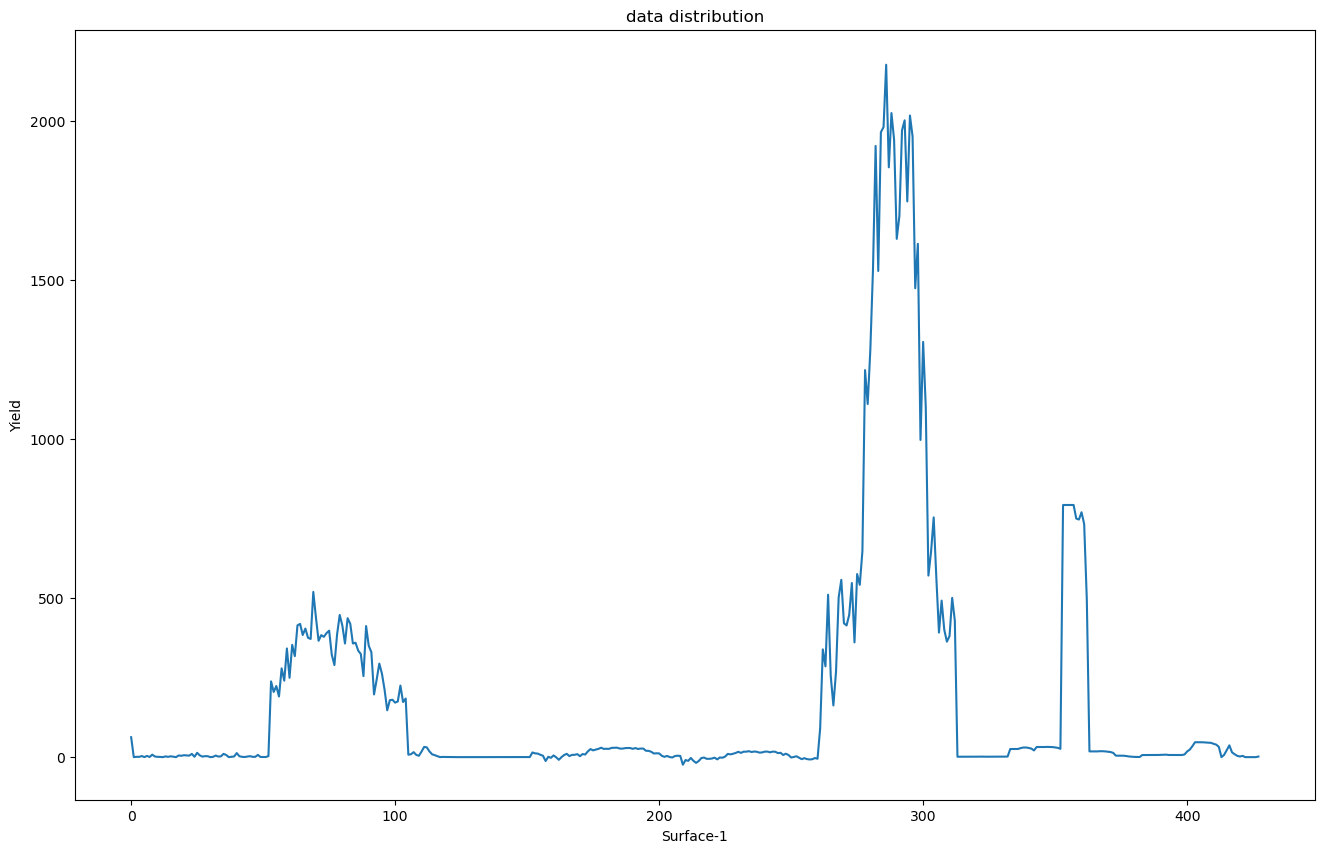

In [73]:
sample = data.loc[0, 'Yield':'S_surface1']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("data distribution")
plt.xlabel("Surface-1")  # Label for the x-axis
plt.ylabel("Yield")  # Label for the y-axis
plt.show()


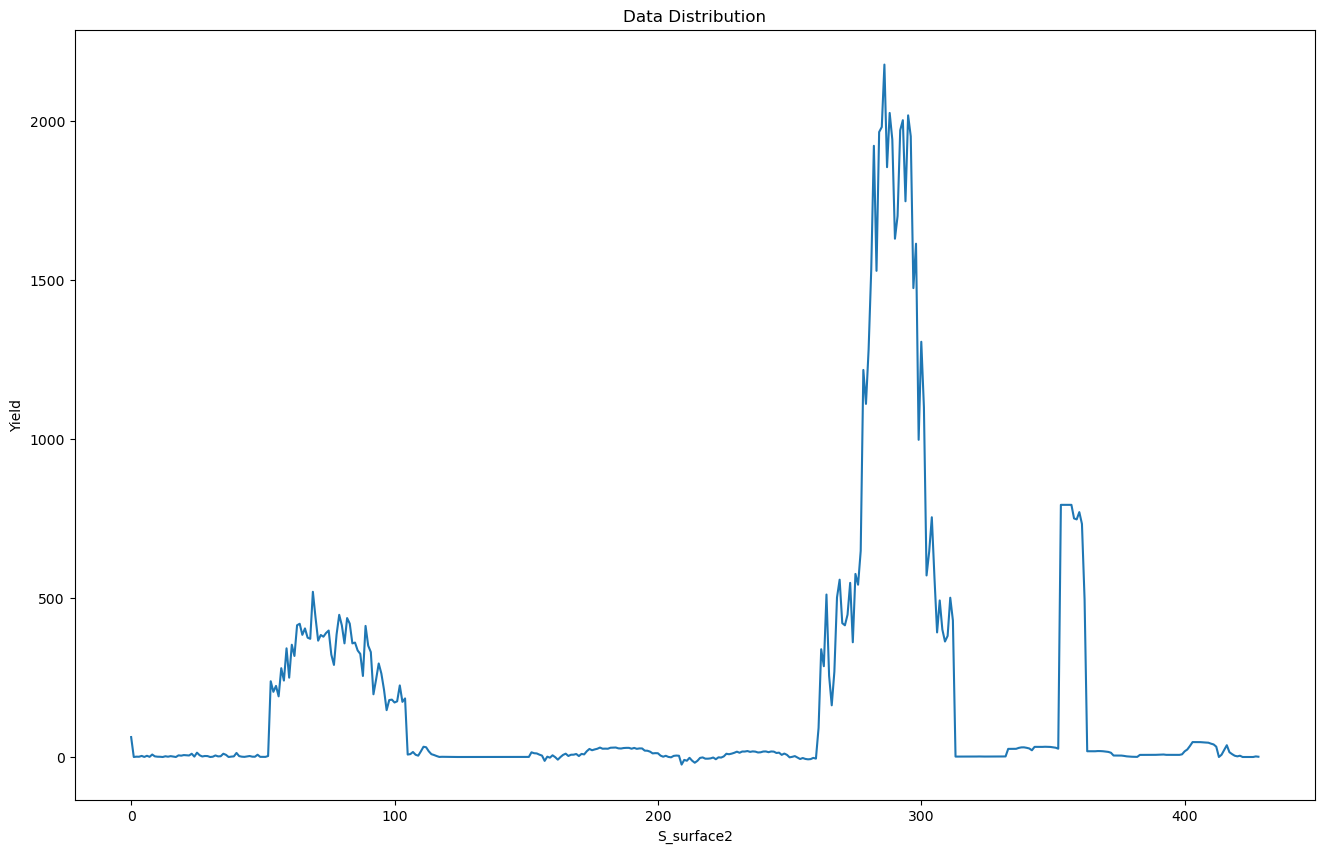

In [74]:
sample = data.loc[0, 'Yield':'S_surface2']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Data Distribution")
plt.xlabel("S_surface2")
plt.ylabel("Yield")
plt.show()


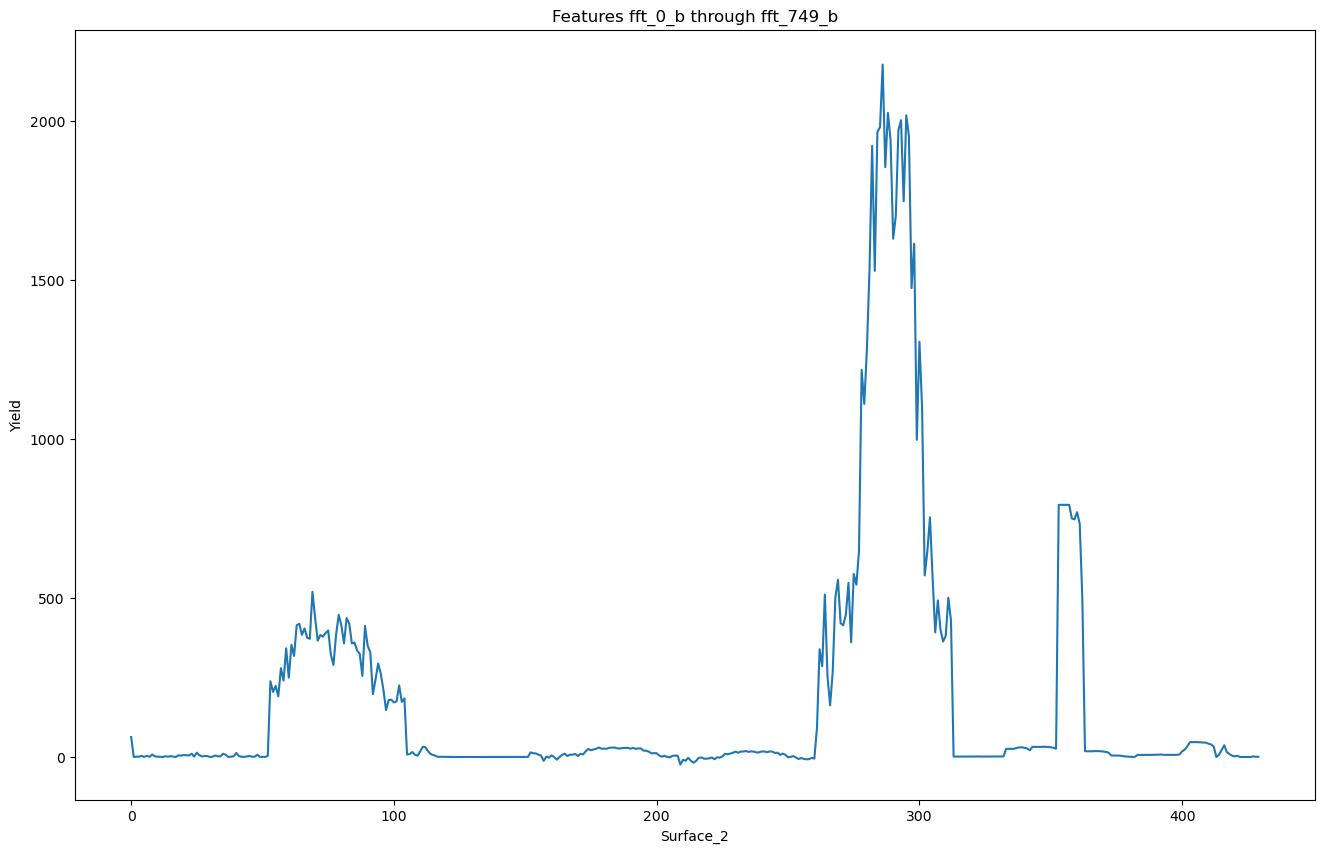

In [75]:
sample = data.loc[0, 'Yield':'S_surface3']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.xlabel("Surface_2")
plt.ylabel("Yield")
plt.show()


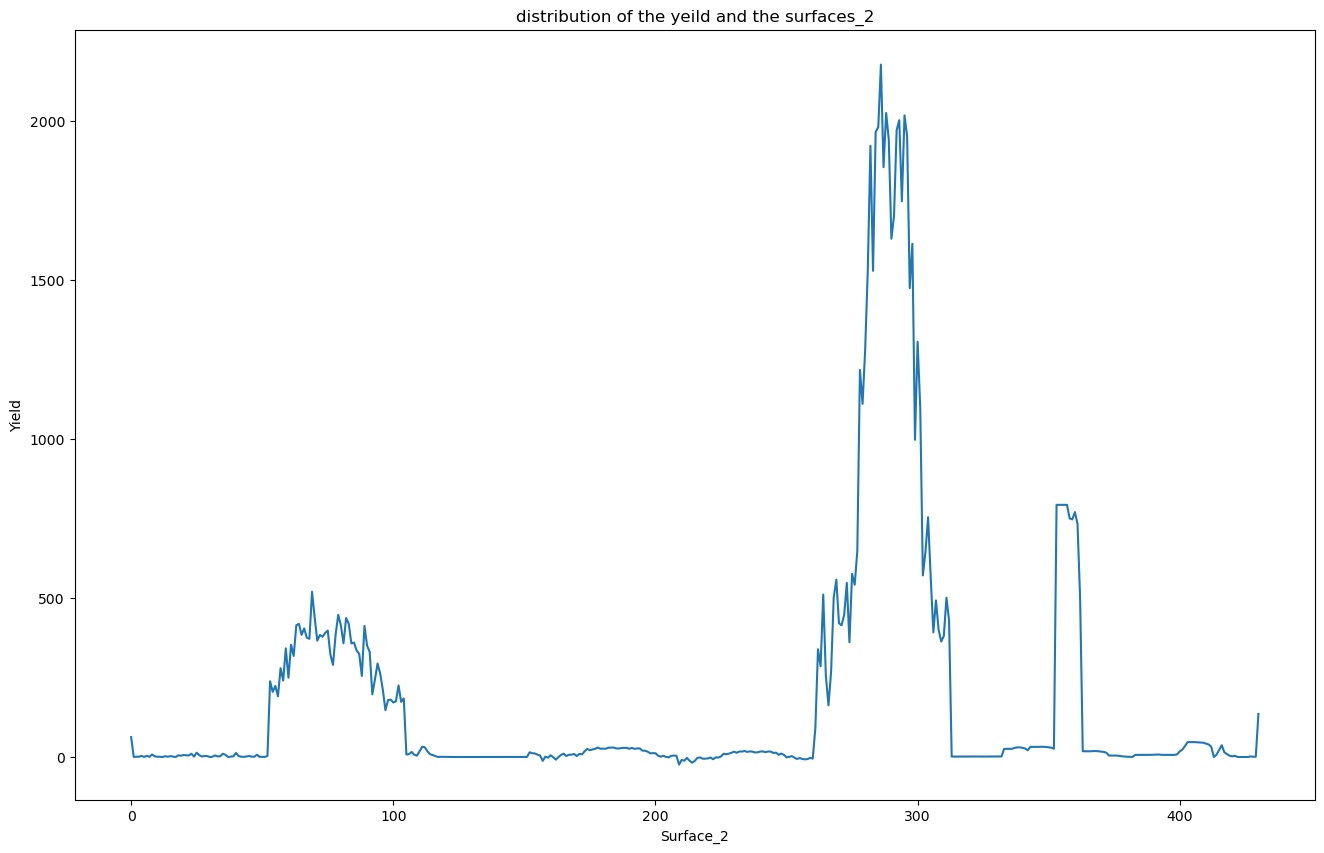

In [77]:
sample = data.loc[0, 'Yield':'S_surface4']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("distribution of the yeild and the surfaces_2")
plt.xlabel("Surface_2")
plt.ylabel("Yield")
plt.show()


In [31]:
data['Yield'].value_counts()

Yield
45.0    111
46.0    104
44.0     97
47.0     97
42.0     96
       ... 
68.6      1
73.6      1
69.5      1
67.7      1
33.9      1
Name: count, Length: 399, dtype: int64

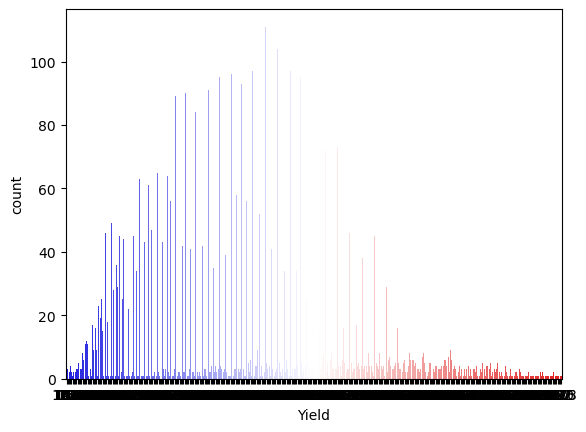

In [11]:
sns.countplot(x="Yield", data=data, palette="bwr")
plt.show()

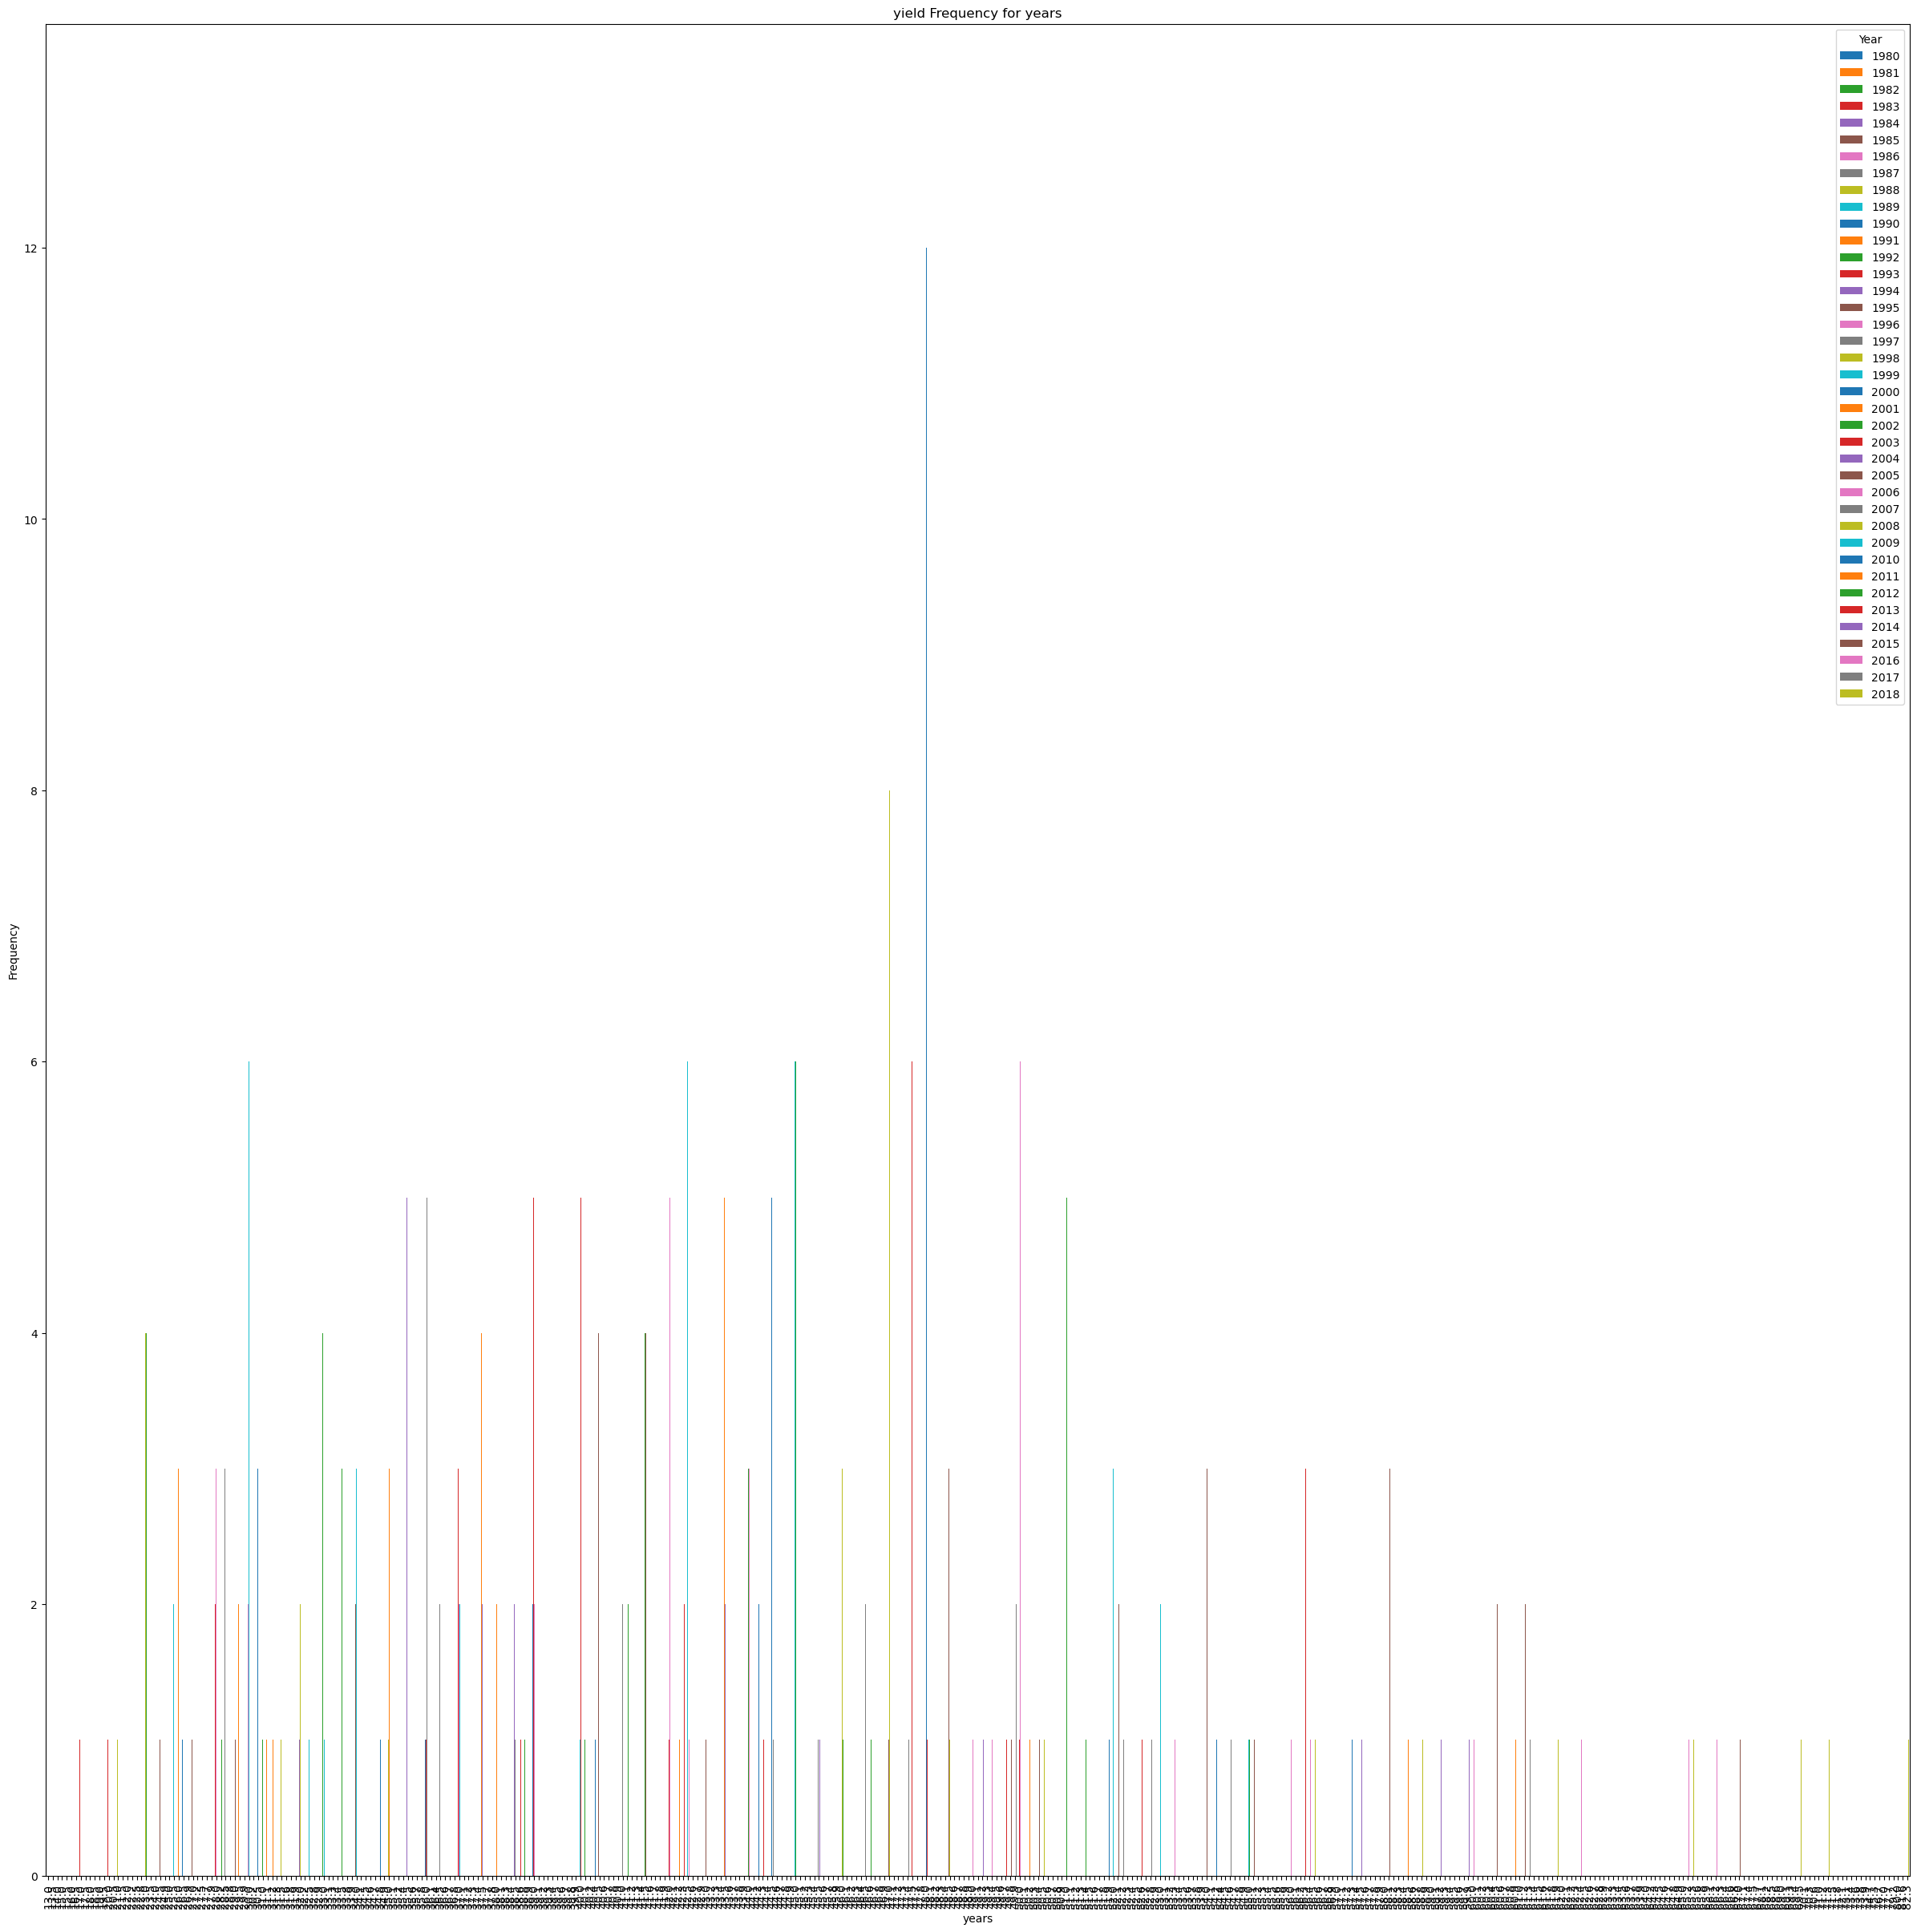

In [14]:
pd.crosstab(data.Yield,data.Year).plot(kind="bar",figsize=(30,30))
plt.title('yield Frequency for years')
plt.xlabel('years')
plt.ylabel('Frequency')
plt.savefig('yield.png')
plt.show()

In [32]:
data.isnull().sum(axis=0)

Year          0
Loc_Id        0
Yield         0
W11           0
W12           0
             ..
P14           0
S_surface1    0
S_surface2    0
S_surface3    0
S_surface4    0
Length: 433, dtype: int64

In [33]:
data.columns


Index(['Year', 'Loc_Id', 'Yield', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16',
       'W17',
       ...
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4'],
      dtype='object', length=433)

In [34]:
X = data[['Year', 'Loc_Id','W11', 'W12', 'W13', 'W14', 'W15','P9', 'P10', 'P11','S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4']]
y = data['Yield']

In [35]:
X

Year  Loc_Id        W11        W12       W13       W14       W15  P9  \
0     2018    1114   0.011905   1.059524  0.821429  3.369048  0.214286   4   
1     2017    1114   0.035714   1.297619  6.559524  0.619048  0.035714   4   
2     2016    1114   0.000000   2.214286  0.142857  0.333333  2.083333   6   
3     2015    1114   3.071429   0.678571  0.119048  0.416667  4.238095   2   
4     2014    1114   2.250000   2.821429  0.880952  0.797619  1.297619   2   
...    ...     ...        ...        ...       ...       ...       ...  ..   
3995  2008     104   2.089286  11.500000  0.000000  0.142857  5.196429   7   
3996  2007     104   2.750000   5.696429  4.303571  0.053571  0.035714   0   
3997  2006     104   0.607143   1.785714  2.696429  0.000000  2.785714   8   
3998  2005     104  10.303571  10.892857  0.250000  0.660714  1.303571   0   
3999  2004     104   4.392857   0.000000  0.750000  0.857143  0.410714   6   

      P10  P11  S_surface1  S_surface2  S_surface3  S_surface4  
0       0    0    1.816667    0.818167    0.824750      135.25  
1       0    0    1.816667    0.818167    0.824750      135.25  
2       0    0    1.816667    0.818167    0.824750      135.25  
3       1    2    1.816667    0.818167    0.824750      135.25  
4       2    0    1.816667    0.818167    0.824750      135.25  
...   ...  ...         ...         ...         ...         ...  
3995   10    6    1.750000    0.745000    0.745125      134.75  
3996    0    0    1.750000    0.745000    0.745125      134.75  
3997    0    0    1.750000    0.745000    0.745125      134.75  
3998    0    0    1.750000    0.745000    0.745125      134.75  
3999    1    0    1.750000    0.745000    0.745125      134.75  

[4000 rows x 14 columns]

In [22]:
#y.hvplot.hist(by='Yield', subplots=False, width=1000)

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


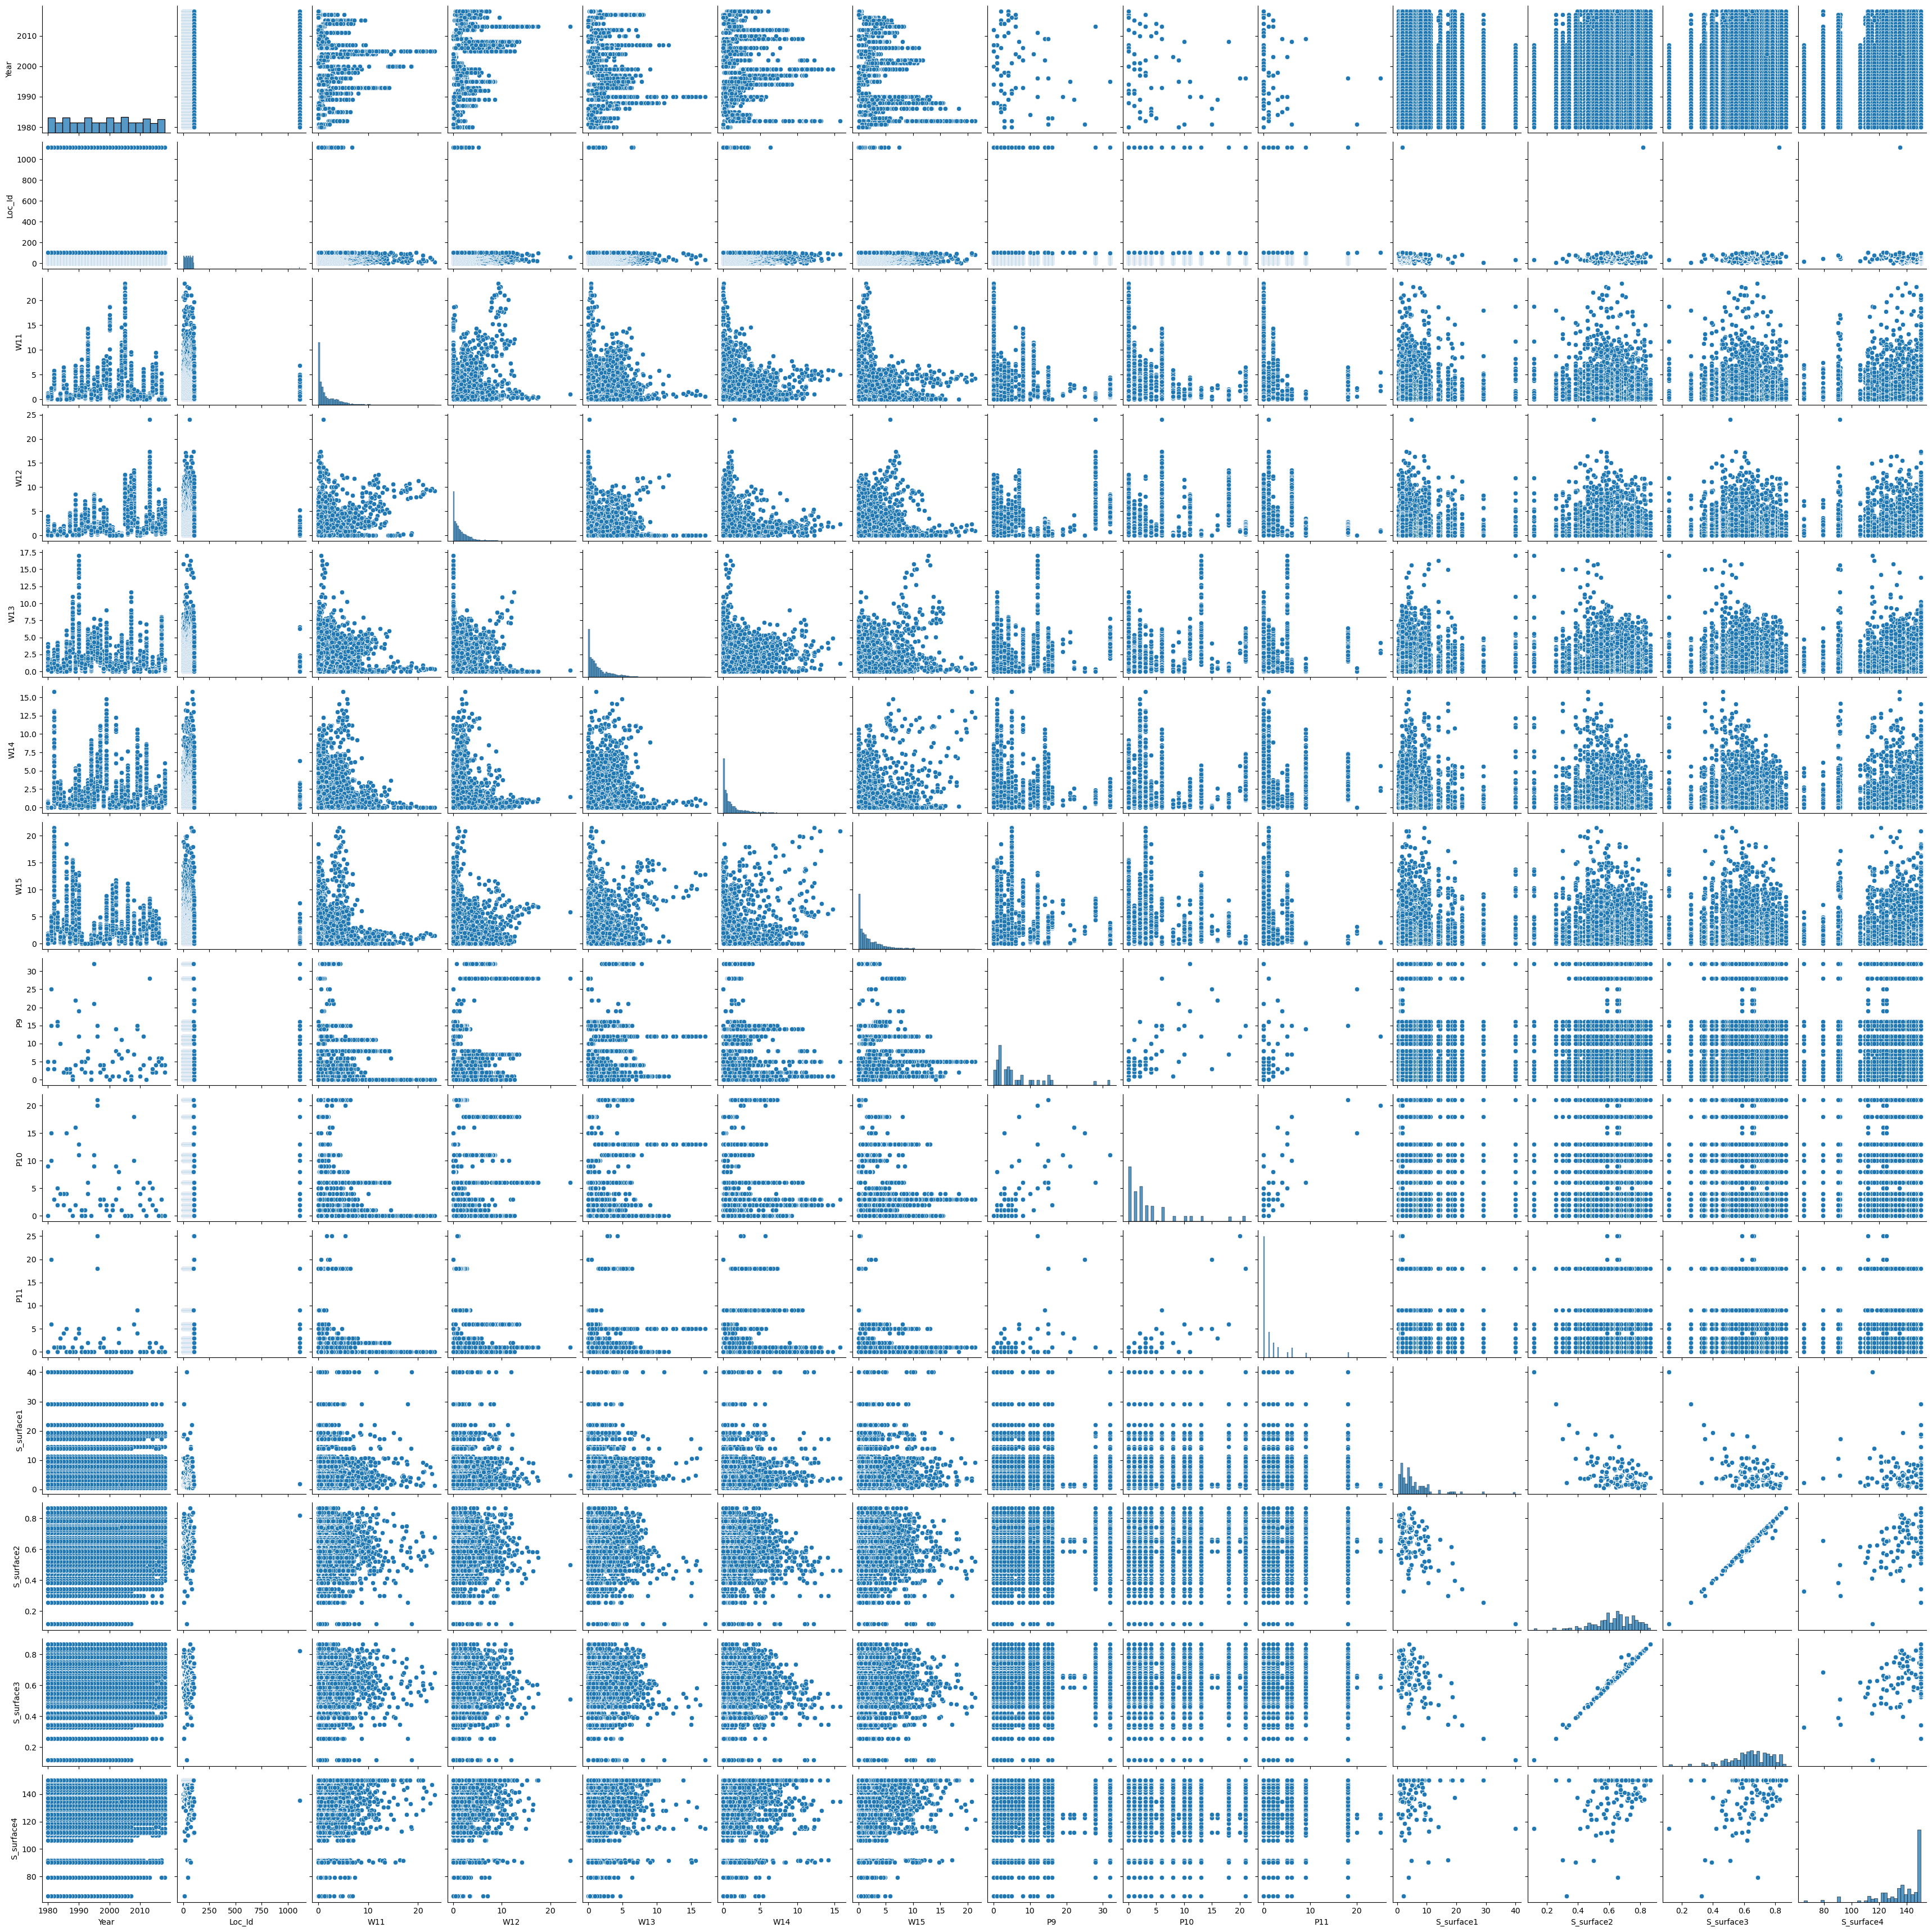

In [36]:
sns.pairplot(X)

In [24]:
y

0       62.6
1       53.6
2       67.5
3       61.2
4       60.0
        ... 
3995    53.5
3996    54.0
3997    54.7
3998    52.6
3999    52.5
Name: Yield, Length: 4000, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [38]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("this is the training score of the linear regression")
print(lr_model.score(X_train, y_train))

this is the training score of the linear regression
0.6198706034743502


In [39]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
print('Accuracy is : ' , regressor.score(X_train, y_train))

Accuracy is :  1.0


In [41]:
# Calculate accuracy for Linear Regression
from sklearn.metrics import r2_score
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared (Linear Regression) on Test Data:", r2_lr)

R-squared (Linear Regression) on Test Data: 0.5988688360409207


In [42]:
import xgboost as xgb

In [31]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:38:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [43]:
xgb_r.score(X_train, y_train)

NameError: name 'xgb_r' is not defined

In [44]:
Result= regressor.predict(np.array([[2018,1114,0.011905,1.059524,0.821429,3.369048,0.214286,4,0,0,1.816667,0.818167,0.824750,135.25]]))

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [45]:
Result

array([62.6])

In [46]:
Result= regressor.predict(np.array([[2016,1114,0.000000,2.214286,0.142857,0.333333,2.083333,6,0,0,1.816667,0.818167,0.824750,135.25]]))

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [47]:
Result

array([67.5])

In [48]:
# Calculate accuracy for Decision Tree Regression
from sklearn.metrics import r2_score
y_pred_dt = regressor.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print("R-squared (Decision Tree Regression) on Test Data:", r2_dt)

R-squared (Decision Tree Regression) on Test Data: 0.6678363300021047


In [49]:
# Calculate accuracy for XGBoost Regression
from sklearn.metrics import mean_squared_error
y_pred_xgb = xgb_r.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = 1 - (mse_xgb / np.var(y_test))
print("R-squared (XGBoost Regression) on Test Data:", r2_xgb)


NameError: name 'xgb_r' is not defined

In [50]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_filename = 'DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(regressor, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [51]:
!pip install -q hvplot

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

In [53]:
data = pd.read_csv('soyabean_data.csv')
data.head()

Year  Loc_Id  Yield       W11       W12       W13       W14       W15  \
0  2018    1114   62.6  0.011905  1.059524  0.821429  3.369048  0.214286   
1  2017    1114   53.6  0.035714  1.297619  6.559524  0.619048  0.035714   
2  2016    1114   67.5  0.000000  2.214286  0.142857  0.333333  2.083333   
3  2015    1114   61.2  3.071429  0.678571  0.119048  0.416667  4.238095   
4  2014    1114   60.0  2.250000  2.821429  0.880952  0.797619  1.297619   

        W16       W17  ...  P9  P10  P11  P12  P13  P14  S_surface1  \
0  3.797619  0.476190  ...   4    0    0    0    0    0    1.816667   
1  1.964286  0.000000  ...   4    0    0    0    0    0    1.816667   
2  0.119048  0.547619  ...   6    0    0    0    0    0    1.816667   
3  0.023810  0.000000  ...   2    1    2    1    2    2    1.816667   
4  1.095238  1.476190  ...   2    2    0    0    0    0    1.816667   

   S_surface2  S_surface3  S_surface4  
0    0.818167     0.82475      135.25  
1    0.818167     0.82475      135.25  
2    0.818167     0.82475      135.25  
3    0.818167     0.82475      135.25  
4    0.818167     0.82475      135.25  

[5 rows x 433 columns]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 433 entries, Year to S_surface4
dtypes: float64(396), int64(37)
memory usage: 13.2 MB


In [54]:
data.isnull().sum(axis=0)

Year          0
Loc_Id        0
Yield         0
W11           0
W12           0
             ..
P14           0
S_surface1    0
S_surface2    0
S_surface3    0
S_surface4    0
Length: 433, dtype: int64

In [55]:
data.columns

Index(['Year', 'Loc_Id', 'Yield', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16',
       'W17',
       ...
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4'],
      dtype='object', length=433)

In [58]:
X = data[['Year', 'Loc_Id','W11', 'W12', 'W13', 'W14', 'W15','P9', 'P10', 'P11','S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4']]
y = data['Yield']

In [59]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
print('Accuracy is : ' , regressor.score(X_train, y_train))

Accuracy is :  1.0


In [81]:
test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_1 = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])


Test set evaluation:
_____________________________________
MAE: 4.562333333333333
MSE: 37.53905
RMSE: 6.126911946486582
R2 Square 0.6352293948208014
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


ValueError: 5 columns passed, passed data had 6 columns

In [63]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
xgb_r.score(X_train, y_train)

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.8975013049911369

In [53]:
test_pred = xgb_r.predict(X_test)
train_pred = xgb_r.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["xgboost", *evaluate(y_test, test_pred) , cross_val(xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123))]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in fav

Test set evaluation:
_____________________________________
MAE: 3.3216267175674434
MSE: 18.219463404847037
RMSE: 4.268426338224315
R2 Square 0.8229596995068784
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5080128058024815
MSE: 10.505359556304503
RMSE: 3.241197241191055
R2 Square 0.8975013049911369
__________________________________


C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:38:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in fav

In [64]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)


0.5727131640457557

In [65]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_3 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:
_____________________________________
MAE: 5.322843314338623
MSE: 46.55103679886706
RMSE: 6.8228320218855645
R2 Square 0.5476590413225194
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.141130865818336
MSE: 43.79374630073958
RMSE: 6.6176843609180676
R2 Square 0.5727131640457557
__________________________________


ValueError: 5 columns passed, passed data had 6 columns

In [66]:
from sklearn.linear_model import ElasticNet

model1 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model1.fit(X_train, y_train)
model1.score(X_train, y_train)

0.6161074406693462

In [67]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_4 = pd.DataFrame(data=[["ElasticNet", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:
_____________________________________
MAE: 5.322843314338623
MSE: 46.55103679886706
RMSE: 6.8228320218855645
R2 Square 0.5476590413225194
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.141130865818336
MSE: 43.79374630073958
RMSE: 6.6176843609180676
R2 Square 0.5727131640457557
__________________________________


ValueError: 5 columns passed, passed data had 6 columns

In [68]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)
sgd_reg.score(X_train, y_train)

0.6141377125479756

In [69]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_5 = pd.DataFrame(data=[["SGDRegressor", *evaluate(y_test, test_pred) , 0]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:
_____________________________________
MAE: 5.322843314338623
MSE: 46.55103679886706
RMSE: 6.8228320218855645
R2 Square 0.5476590413225194
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.141130865818336
MSE: 43.79374630073958
RMSE: 6.6176843609180676
R2 Square 0.5727131640457557
__________________________________


ValueError: 5 columns passed, passed data had 6 columns

In [71]:
result = pd.concat([results_df_1, results_df_2, results_df_3, results_df_4,results_df_5], axis=0)


NameError: name 'results_df_1' is not defined

In [87]:
result

Model       MAE        MSE      RMSE  R2 Square  \
0  DecisionTreeRegressor  4.562333  37.539050  6.126912   0.635229   
0                xgboost  3.321627  18.219463  4.268426   0.822960   
0                  Lasso  5.322843  46.551037  6.822832   0.547659   
0             ElasticNet  5.322843  46.551037  6.822832   0.547659   
0           SGDRegressor  5.322843  46.551037  6.822832   0.547659   

   Cross Validation  
0          0.579097  
0          0.758537  
0          0.475573  
0          0.479715  
0          0.000000

In [72]:
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
plt.bar(result.Model, result['MAE'])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('MEAN ABSOLUTE ERROR')
plt.xticks(result.Model, result.Model)
plt.show()


NameError: name 'result' is not defined

<Figure size 1200x800 with 0 Axes>

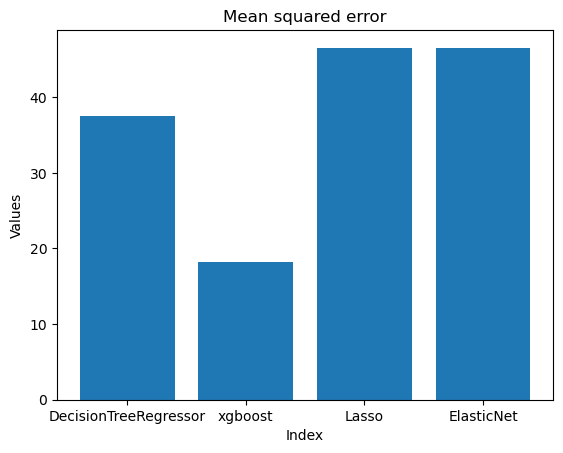

In [63]:
plt.bar(result.Model, result['MSE'])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Mean squared error')
plt.xticks(result.Model, result.Model)  # Setting the x-axis labels to match the DataFrame index
plt.show()

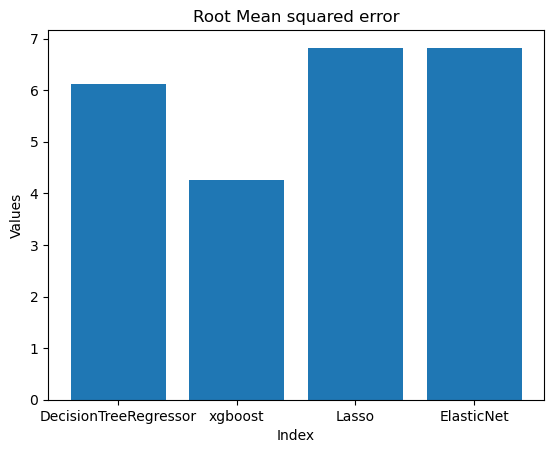

In [64]:

plt.bar(result.Model, result['RMSE'])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Root Mean squared error')
plt.xticks(result.Model, result.Model)  # Setting the x-axis labels to match the DataFrame index
plt.show()

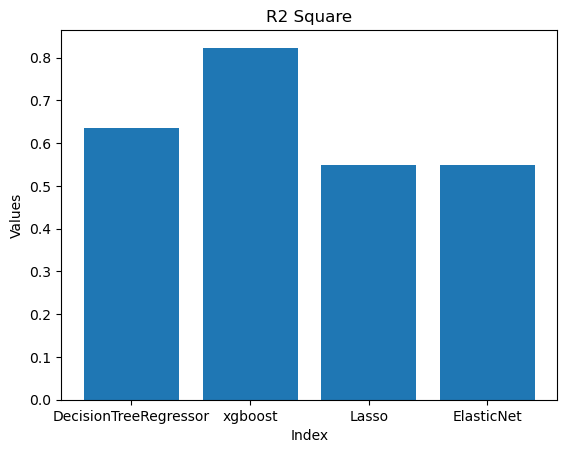

In [65]:


plt.bar(result.Model, result['R2 Square'])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('R2 Square')
plt.xticks(result.Model, result.Model)  # Setting the x-axis labels to match the DataFrame index
plt.show()

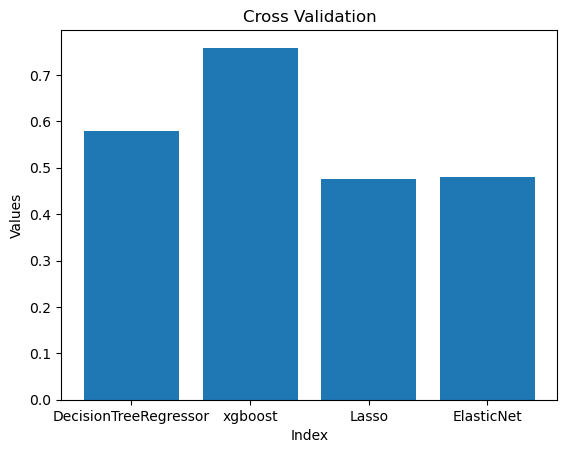

In [66]:
plt.bar(result.Model, result['Cross Validation'])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Cross Validation')
plt.xticks(result.Model, result.Model)  # Setting the x-axis labels to match the DataFrame index
plt.show()

In [67]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_filename = 'Dec_T.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(regressor, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [68]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
xgb_rfilename = 'xgb_r.pkl'
# Open the file to save as pkl file
xgb_rModel_pkl = open(xgb_rfilename, 'wb')
pickle.dump(xgb_r, xgb_rModel_pkl)
# Close the pickle instances
xgb_rModel_pkl.close()

In [69]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
modelfilename = 'Lasso.pkl'
# Open the file to save as pkl file
modelModel_pkl = open(modelfilename, 'wb')
pickle.dump(model, modelModel_pkl)
# Close the pickle instances
modelModel_pkl.close()

In [70]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
model1filename = 'Elasticnet.pkl'
# Open the file to save as pkl file
model1Model_pkl = open(model1filename, 'wb')
pickle.dump(model1, model1Model_pkl)
# Close the pickle instances
model1Model_pkl.close()

In [71]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
sgd_regfilename = 'sgd_reg.pkl'
# Open the file to save as pkl file
sgd_regModel_pkl = open(sgd_regfilename, 'wb')
pickle.dump(sgd_reg, sgd_regModel_pkl)
# Close the pickle instances
sgd_regModel_pkl.close()

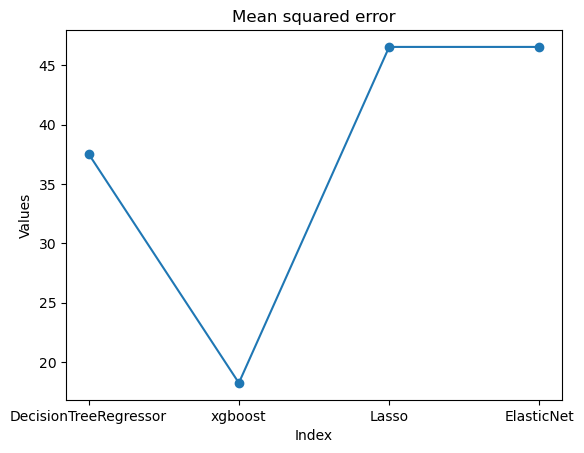

In [72]:
plt.plot(result.Model, result['MSE'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Mean squared error')
plt.show()

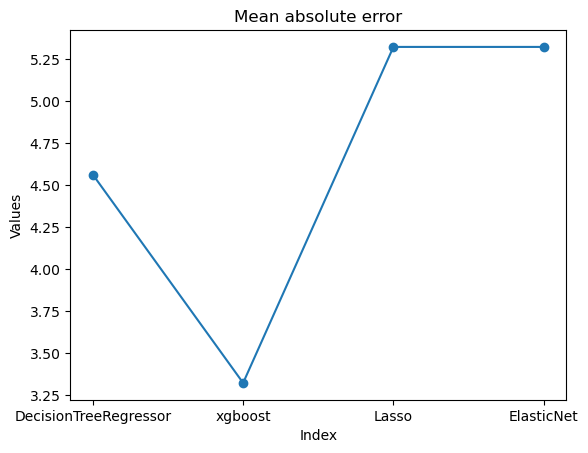

In [73]:
plt.plot(result.Model, result['MAE'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Mean absolute error')
plt.show()

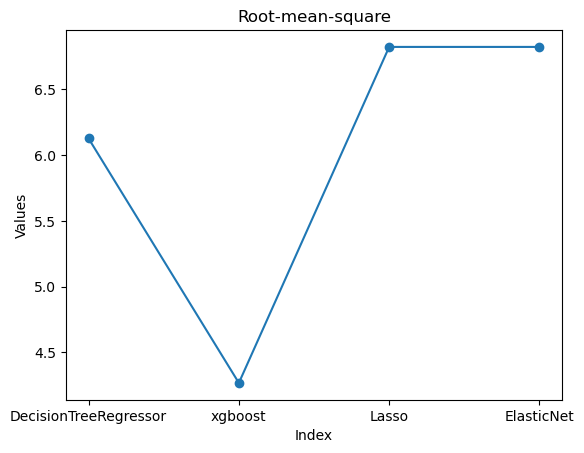

In [74]:
plt.plot(result.Model, result['RMSE'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Root-mean-square')
plt.show()

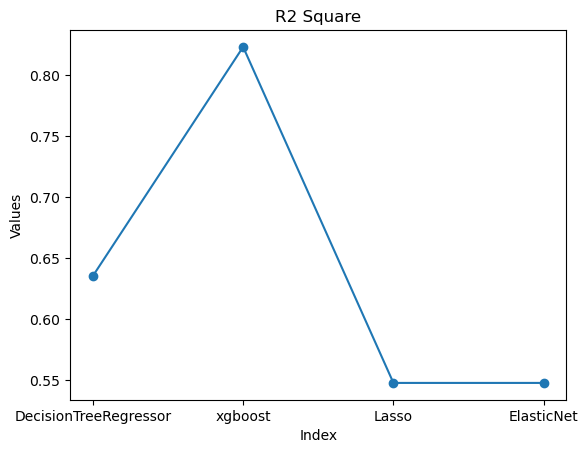

In [75]:
#R2 Square
plt.plot(result.Model, result['R2 Square'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('R2 Square')
plt.show()

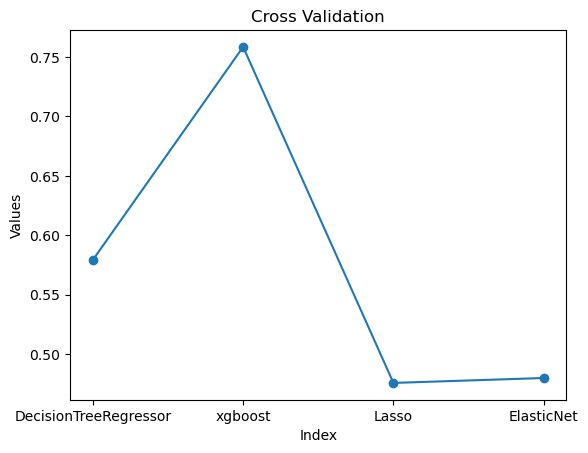

In [76]:
#R2 Square
plt.plot(result.Model, result['Cross Validation'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Cross Validation')
plt.show()

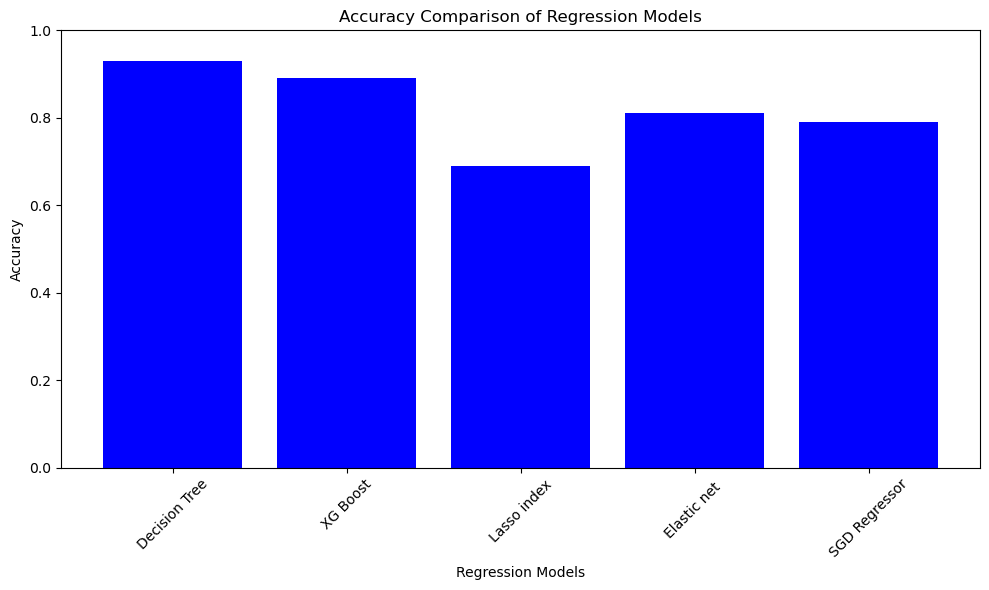

In [80]:
import matplotlib.pyplot as plt

# Define the model names and their respective accuracies
model_names = ["Decision Tree", "XG Boost", "Lasso index", "Elastic net ", "SGD Regressor"]
accuracies = [0.93, 0.89, 0.69, 0.81, 0.79]

# Create a bar graph to compare accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Regression Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Regression Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()
